In [98]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#importing the dataset
db=pd.read_csv('train.csv')

In [100]:
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
db['Cabin'].isnull().mean()*100

77.10437710437711

In [105]:
db['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [106]:
# we can drop cabin column as it contain 77% null value also it just contain room no number which want add value to our analysis
db.drop(columns='Cabin',inplace=True)

In [107]:
# we can drop the columns like passenger id and name as they will not affect our data analysis
db.drop(columns=['PassengerId','Name'],inplace=True)

In [108]:
db.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

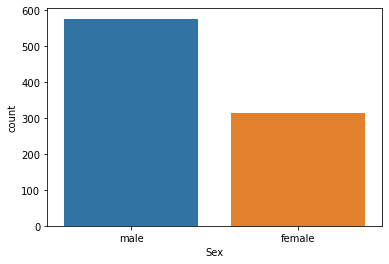

In [109]:
sns.countplot(db['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

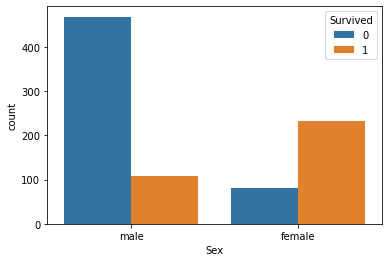

In [110]:
sns.countplot(x='Sex',hue='Survived',data=db)

More female survived compared to men

<AxesSubplot:xlabel='Pclass', ylabel='count'>

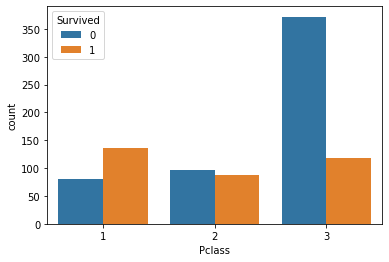

In [111]:
sns.countplot(x='Pclass',hue='Survived',data=db)

1st class passengers survived the most
while class 3 passenger died the most

<AxesSubplot:xlabel='Embarked', ylabel='count'>

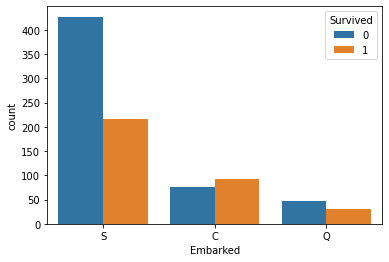

In [112]:
sns.countplot(x='Embarked',hue='Survived',data=db)

passengers who embarked the ship from s survived the most

<AxesSubplot:xlabel='Parch', ylabel='count'>

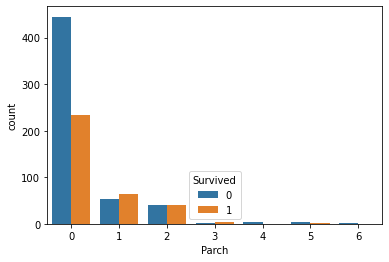

In [113]:
sns.countplot(x='Parch',hue='Survived',data=db)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

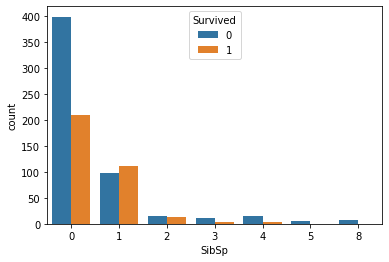

In [114]:
sns.countplot(x='SibSp',hue='Survived',data=db)

In [115]:
db['Family']=db['SibSp']+db['Parch']+1

In [116]:
db.drop(columns=['SibSp','Parch'],inplace=True)

<AxesSubplot:xlabel='Family', ylabel='count'>

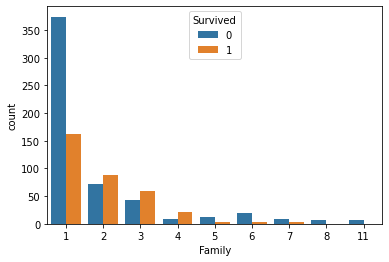

In [117]:
sns.countplot(x='Family',hue='Survived',data=db)

In [118]:
db.groupby(['Pclass','Sex']).mean().Age

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [119]:
db['Age'].fillna(0,inplace=True)
age=list(db['Age'])
sex=list(db['Sex'])
pclass=list(db['Pclass'])
for i in range(len(age)):
    if age[i]==0:
        if pclass[i]==1:
            if sex[i]=='Male':
               age[i]=41.281386
            else:
                age[i]=34.611765
        elif pclass[i]==2: 
            if sex[i]=='Male':
                age[i]=30.740707
            else:
                age[i]=28.722973
        else:
            if sex[i]=='Male':
                age[i]=26.507589
            else:
                age[i]=21.750000
db['Age']=age                

In [120]:
db.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    2
Family      0
dtype: int64

In [121]:
#changing categorical valiable sex
Gender=pd.get_dummies(db['Sex'],drop_first=True)
# 1--> male  0--> female

In [122]:
db=pd.concat([db,Gender],axis=1)

In [123]:
db.drop(columns='Sex',inplace=True)

In [124]:
db.rename(columns={'male':'Gender'},inplace=True)

In [125]:
db['Ticket'].nunique()

681

In [126]:
#we can drop ticket no as it countain some not much affecting null values
db.drop(columns='Ticket',inplace=True)

In [127]:
db

,Survived,Pclass,Age,Fare,Embarked,Family,Gender
0,0,3,22.00,7.2500,S,2,1
1,1,1,38.00,71.2833,C,2,0
2,1,3,26.00,7.9250,S,1,0
3,1,1,35.00,53.1000,S,2,0
4,0,3,35.00,8.0500,S,1,1
...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,S,1,1
887,1,1,19.00,30.0000,S,1,0
888,0,3,21.75,23.4500,S,4,0
889,1,1,26.00,30.0000,C,1,1


In [128]:
#filling null value in embarked with mode
db['Embarked'].fillna(db['Embarked'].mode()[0],inplace=True)

In [129]:
embark=pd.get_dummies(db['Embarked'],drop_first=True)
db=pd.concat([db,embark],axis=1)

In [130]:
db.drop(columns='Embarked',inplace=True)

In [131]:
x=db.drop(columns=['Survived'])
y=db['Survived']

In [132]:
x

,Pclass,Age,Fare,Family,Gender,Q,S
0,3,22.00,7.2500,2,1,0,1
1,1,38.00,71.2833,2,0,0,0
2,3,26.00,7.9250,1,0,0,1
3,1,35.00,53.1000,2,0,0,1
4,3,35.00,8.0500,1,1,0,1
...,...,...,...,...,...,...,...
886,2,27.00,13.0000,1,1,0,1
887,1,19.00,30.0000,1,0,0,1
888,3,21.75,23.4500,4,0,0,1
889,1,26.00,30.0000,1,1,0,0


In [133]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [134]:
from sklearn.preprocessing import StandardScaler


In [135]:
sc=StandardScaler()

In [136]:
x=sc.fit_transform(x)

C:\Users\Manshi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,train_size=0.8)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
model=LogisticRegression()

In [141]:
model.fit(x_train,y_train)

LogisticRegression()

In [142]:
prediction=model.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy=accuracy_score(y_test,prediction)

In [146]:
accuracy

0.7821229050279329